# Normal Equation

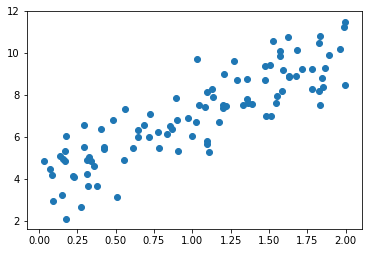

In [1]:
# Exploring the Normal Equation (closed-form solution for linear regression)
# theta_hat = (X_T . X)^-1 . X_T . y

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# equation is y = 4 + 3x + <noise>

plt.scatter(X, y)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance to account for theta0 bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.87980163],
       [3.11235614]])

In [3]:
# Make predictions based on the theta_best we found with the closed-form solution

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 3.87980163],
       [10.10451391]])

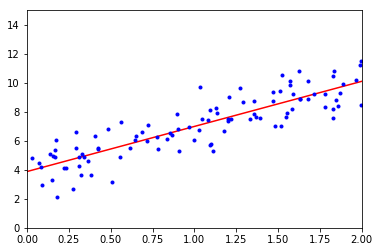

In [4]:
# Plot this model's predictions

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
# Scikit-Learn equivalent

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

print(lin_reg.predict(X_new))

[3.87980163] [[3.11235614]]
[[ 3.87980163]
 [10.10451391]]


# Batch Gradient Descent

In [11]:
# Gradient Descent

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for _ in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.87980163],
       [3.11235614]])

# Stochastic Gradient Descent

In [15]:
# By hand

n_epochs = 50000 # number of epochs
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        rand_ix = np.random.randint(m) # get a random index of the data set consisting of m items
        xi = X_b[rand_ix:rand_ix + 1]
        yi = y[rand_ix:rand_ix + 1]
        gradients = 2/m * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[2.97853844],
       [3.50256317]])

In [21]:
# Using Scikit-Learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=None)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


(array([3.82326241]), array([3.04414856]))

# Polynomial Regression
## Add powers of each feature as new features